# EEG data analysis - exam project

## 1. Preprocessing of EEG data

The following steps will be performed:
1. Load the data
2. Exclude bad channels
3. Common average reference
4. Filtering
5. Artefact rejection

In [1]:
!pip install mne

In [2]:
import mne
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Loading the sample data:

#Create a path that goes to the folder where the data is:
sample_data_folder = "/work/552256/FaceWord/"

#Connect that folder's path with data which has to be loaded:
sample_data_raw_file = os.path.join(sample_data_folder, 'group6.vhdr')

#Specifying the names of the two channels (HEOG are the first 28 channels, VEOG are the two near the eye, on the skin):
raw = mne.io.read_raw_brainvision(sample_data_raw_file, eog=('HEOG', 'VEOG'))

#Specifying that for now, there are no "bad" channels:
raw.info['bads'] = []

#Loading the data
raw.load_data()

# specify electrode locations
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage, verbose=False)

Extracting parameters from /work/552256/FaceWord/group6.vhdr...
Setting channel info structure...
Reading 0 ... 1203259  =      0.000 ...  1203.259 secs...


<RawBrainVision | group6.eeg, 32 x 1203260 (1203.3 s), ~293.8 MB, data loaded>

In [4]:
# plotting the layout
# layout_from_data = mne.channels.make_eeg_layout(raw.info)
# layout_from_data.plot();

In [4]:
# selecting only EEG and stimulus data & plotting raw data
raw.pick_types(meg=False, eeg=True, eog=True, stim=True, exclude=[])
raw.plot(scalings=dict(eeg=50e-6));
#data.plot(duration=200); # the ; at the end of the line suppresses the output (if not used, the plot will be displayed twice)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Using matplotlib as 2D backend.


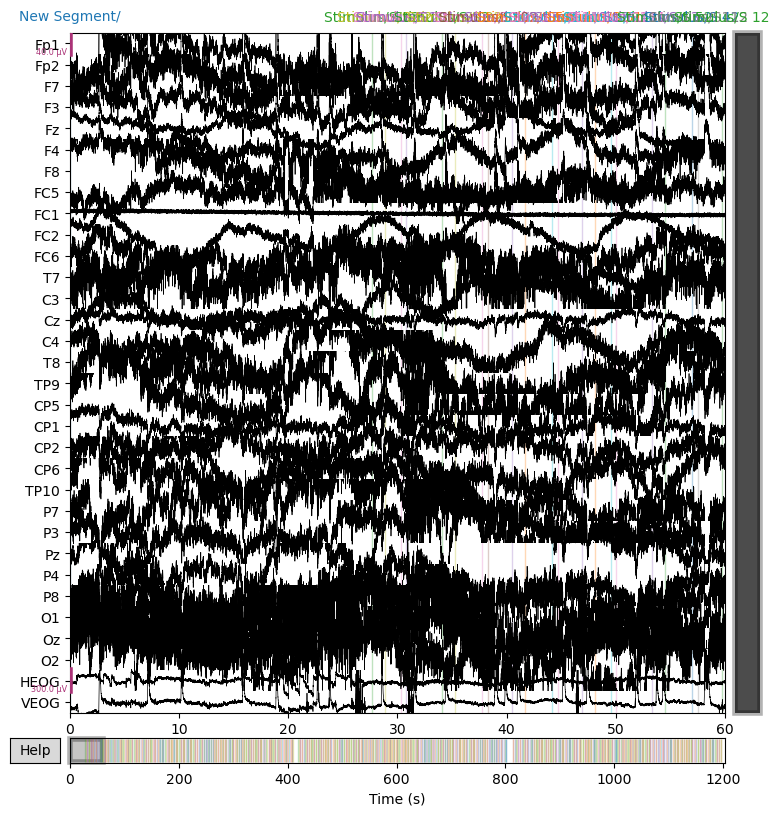

In [6]:
#Plotting a minute of recordings
raw.plot(n_channels=32, duration=60);

## 2. Excluding bad channels.

By looking at the plot above, it seems like FC1 channel is relatively flat, therefore it will be marked as a bad channel in the following code chunk.

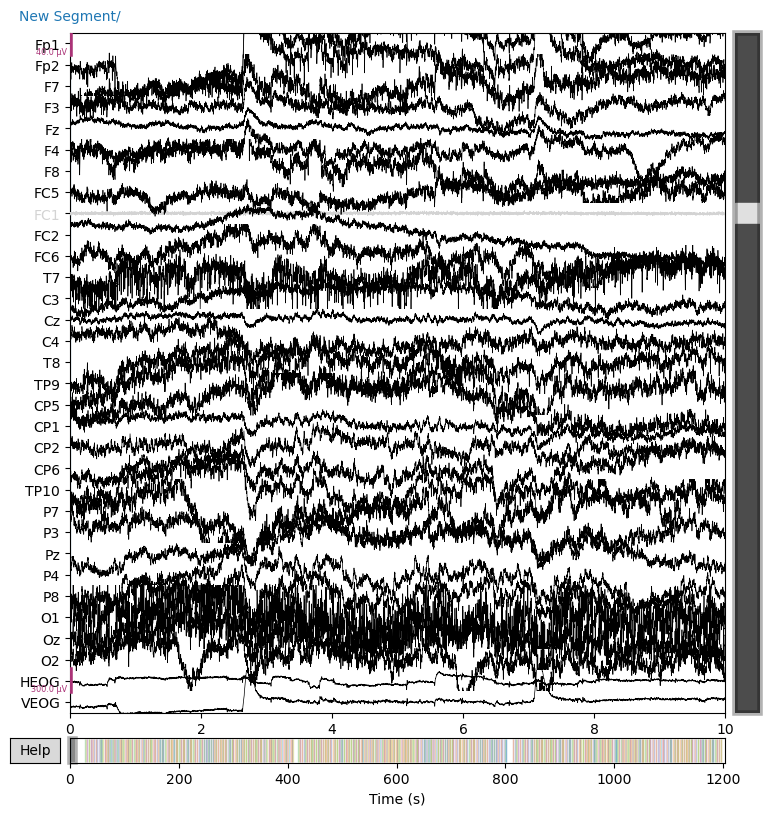

In [5]:
raw.info['bads'] = ['FC1']
raw.plot(n_channels=32);

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


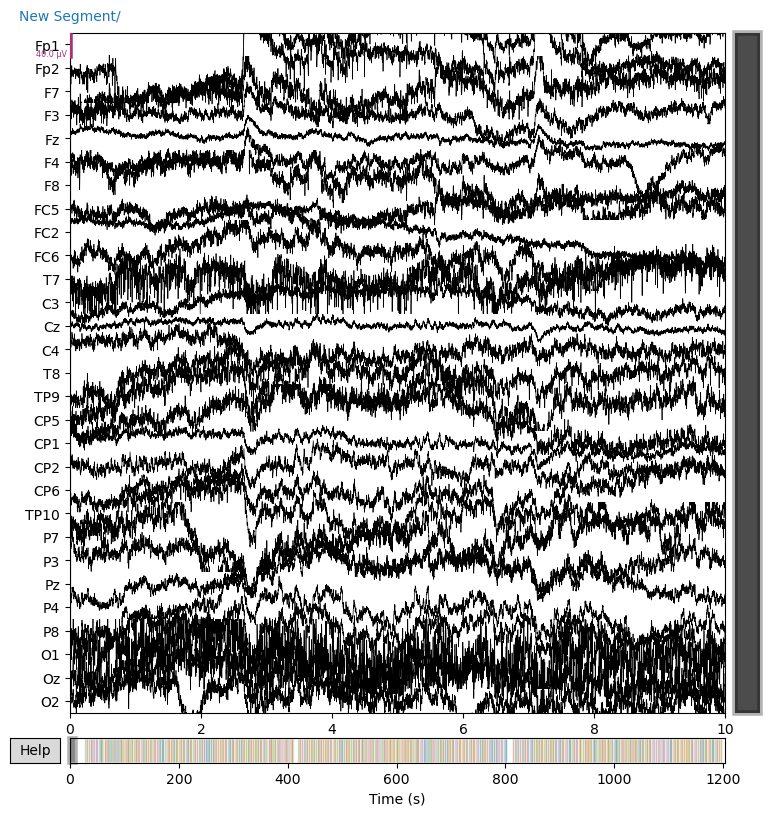

In [7]:
# Excluding the channel by using pick_types() function:

raw.pick_types(meg=False, eeg=True, stim=True, exclude='bads')
raw.plot(n_channels=32);

## 3. Common average reference.

Short explanation to self: 
The idea - to compute the *average of the signal* at *all* EEG electrodes and *subtract* it from the EEG signal at every electrode for every time point.  

In [8]:
raw.set_eeg_reference(ref_channels='average', ch_type='eeg')

Applying average reference.
Applying a custom ('EEG',) reference.


<RawBrainVision | group6.eeg, 29 x 1203260 (1203.3 s), ~266.3 MB, data loaded>

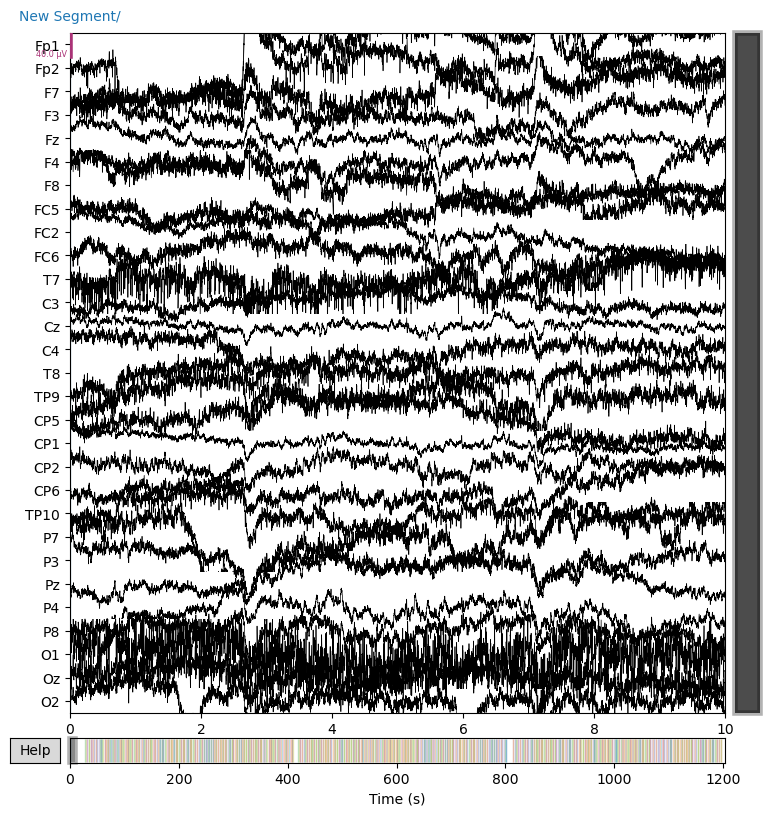

In [10]:
raw.plot(n_channels=32);

## 4. Filtering

In [9]:
# high-pass filter the data - minimize slow drifts

raw = raw.filter(0.1, None)

# low-pass filter the data - excludes high frequency noise

raw = raw.filter(None, 40)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 33001 samples (33.001 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 331 samples (0.331 s)



[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    1.6s finished


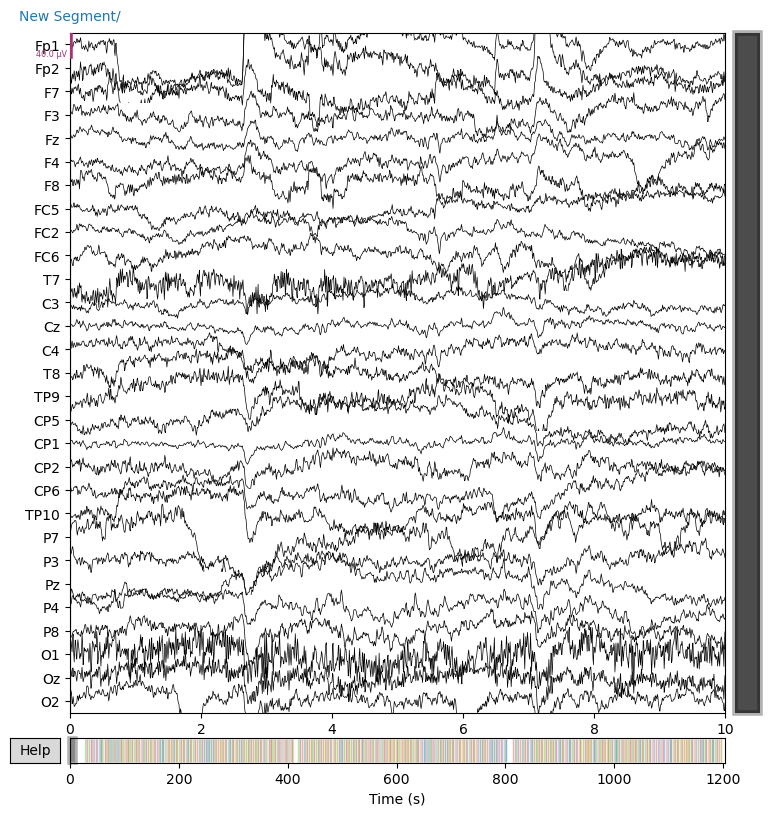

In [10]:
# Inspecting the effect of filtering:
raw.plot(n_channels=32);

## 5. Artefact rejection.

In [11]:
# Specifying the threshold
reject = {'eeg': 150e-6}

# Epoching of EEG data

In [12]:
# Locating the events:
events, _ = mne.events_from_annotations(raw)

#unique trigger values
np.unique(events[:, 2])

Used Annotations descriptions: ['New Segment/', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 21', 'Stimulus/S 22', 'Stimulus/S 31', 'Stimulus/S 32', 'Stimulus/S 41', 'Stimulus/S 42', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S201', 'Stimulus/S202', 'Stimulus/S211', 'Stimulus/S212']


array([   11,    12,    13,    21,    22,    31,    32,    41,    42,
          51,    52,   101,   102,   111,   112,   201,   202,   211,
         212, 99999])

/tmp/ipykernel_897/3831688999.py:25: RuntimeWarning: event 99999 missing from event_id will be ignored
  mne.viz.plot_events(events, sfreq=250, first_samp=raw.first_samp, event_id=event_id);
/tmp/ipykernel_897/3831688999.py:25: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  mne.viz.plot_events(events, sfreq=250, first_samp=raw.first_samp, event_id=event_id);


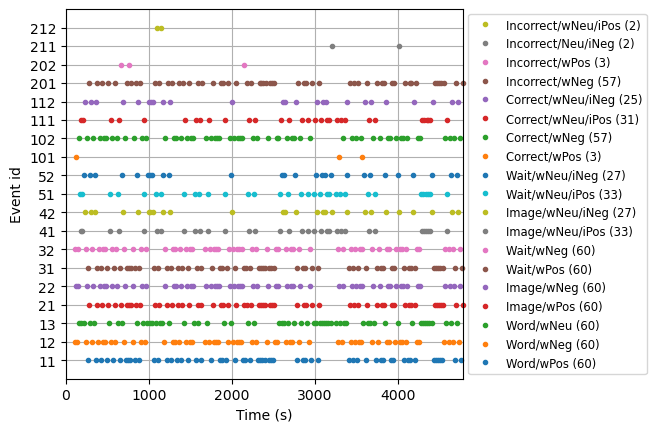

In [13]:
#Dictionary with the labels (of the triggers) of the events:

event_id = {'Word/wPos': 11, # positive word
 'Wait/wPos': 31, # waiting time after positive word
 'Image/wPos': 21, # positive image (always following pos word)
 'Word/wNeg': 12, # negative word
 'Wait/wNeg': 32, # waiting time after negative word
 'Image/wNeg': 22, # negative image (always following neg word)
 'Word/wNeu': 13, # neutral word
 'Wait/wNeu/iPos': 51, # wait time after neu w (before pos i)
 'Image/wNeu/iPos': 41, # positive image (after neu word)
 'Wait/wNeu/iNeg': 52, # wait time after neu w (before neg i)
 'Image/wNeu/iNeg': 42, # negative image (after neu word)
 'Correct/wPos': 101, # correct response ('b') to pos w + image
 'Correct/wNeg': 102, # correct response ('y') to neg w + image
 'Correct/wNeu/iPos': 111, # cor resp ('b') to neu w + pos image
 'Correct/wNeu/iNeg': 112, # cor resp ('y') to neu w + neg image
 'Incorrect/wPos': 202, # incor resp ('y') to pos w + image
 'Incorrect/wNeg': 201, # incor resp ('b') to neg w + image
 'Incorrect/wNeu/iPos': 212, # incor resp ('y') to neu w + pos i
 'Incorrect/Neu/iNeg': 211, # incor resp ('b') to neu w + neg i
 }

#Plot:
mne.viz.plot_events(events, sfreq=250, first_samp=raw.first_samp, event_id=event_id);

In [14]:
#Setting the time window:

#Time window (-100 to 700 ms)
tmin, tmax = -0.1, 0.7

#Creating a variable "picks" that only takes EEG channels
picks = mne.pick_types(raw.info, meg=False, eeg=True, eog=False)

#Creating the epochs
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, picks=picks,
                    baseline=(None, 0), reject=reject, preload=True)

#Saving epochs object:
epochs.save('faceword-epo.fif', overwrite=True)

Not setting metadata
720 matching events found
Setting baseline interval to [-0.1, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 720 events and 801 original time points ...
    Rejecting  epoch based on EEG : ['TP10', 'Oz', 'O2']
    Rejecting  epoch based on EEG : ['Fp2', 'TP10', 'Oz', 'O2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2', 'T7', 'P3']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2', 'O2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epo

In [15]:
# Downsampling to 250Hz. 

epochs_resampled = epochs.resample(250)

# ERP analysis

In [16]:
# Grouping the epochs:


img_wNeu= epochs_resampled['Image/wNeu']
img_wPos= epochs_resampled['Image/wPos']
img_wNeg= epochs_resampled['Image/wNeg']

img = epochs_resampled['Image']

Not setting metadata
424 matching events found
No baseline correction applied
0 projection items activated


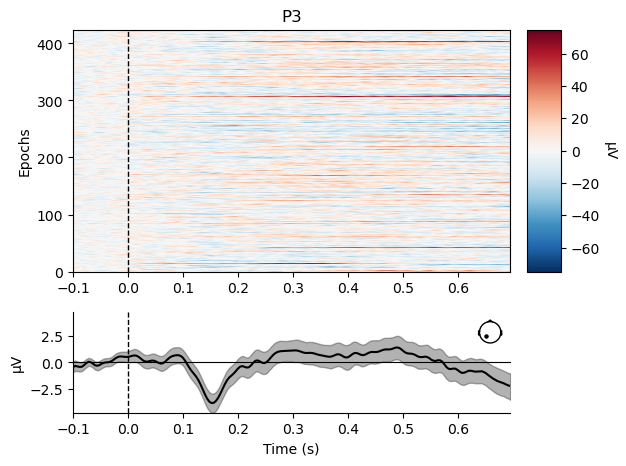

Not setting metadata
424 matching events found
No baseline correction applied
0 projection items activated


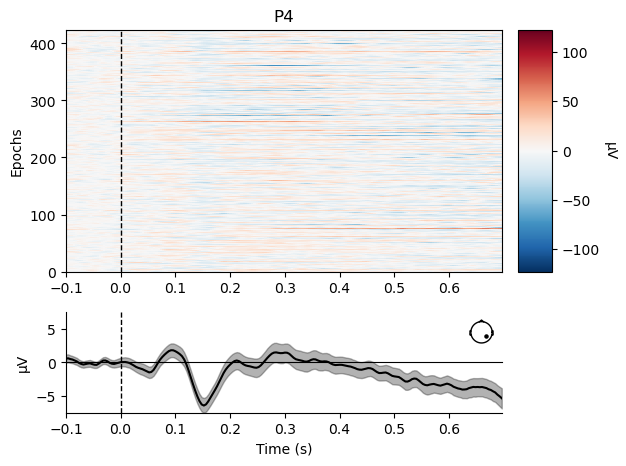

Not setting metadata
424 matching events found
No baseline correction applied
0 projection items activated


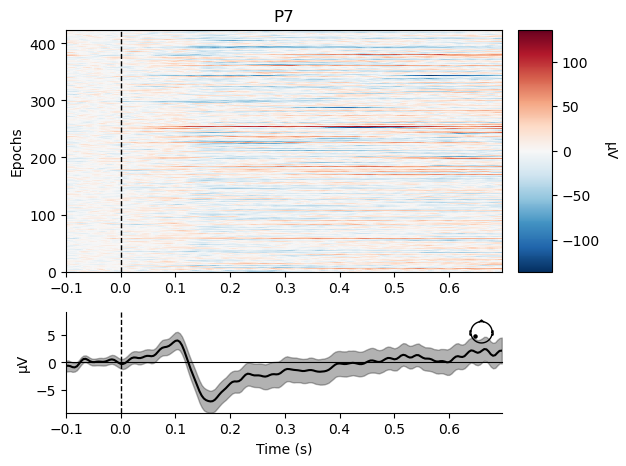

Not setting metadata
424 matching events found
No baseline correction applied
0 projection items activated


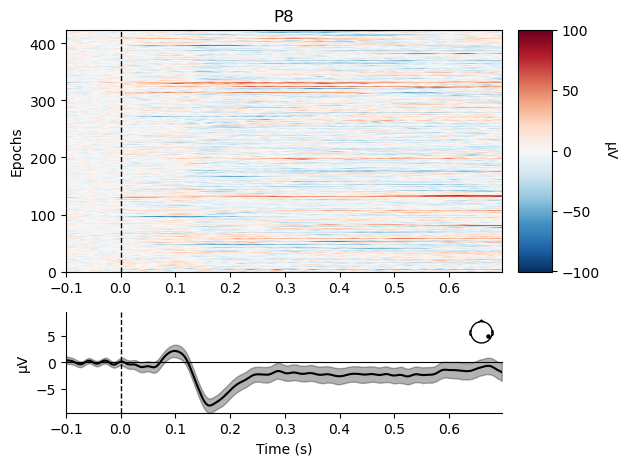

In [17]:
epochs.plot_image(picks=['P3']);
epochs.plot_image(picks=['P4']);
epochs.plot_image(picks=['P7']);
epochs.plot_image(picks=['P8']);

In [18]:
#Creating an evoked object:

img_wNeu_evoked = img_wNeu.average()

img_wPos_evoked = img_wPos.average()

img_wNeg_evoked = img_wNeg.average()

img_evoked = img.average()

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


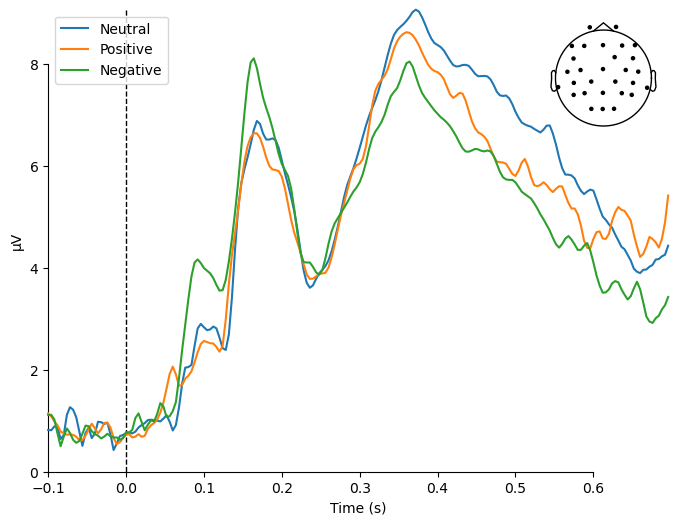

[<Figure size 800x600 with 2 Axes>]

In [19]:
#GFP - global field power = standard deviation across all channels in each sample/time stamp. When there is 
#variations across samples in all of your data. Just to see which time stamp is interesting to look at.

#Plotting/comparing the evoked variables:
mne.viz.plot_compare_evokeds(dict(Neutral = img_wNeu_evoked, 
                                  Positive = img_wPos_evoked, 
                                  Negative = img_wNeg_evoked),
                             legend='upper left', show_sensors='upper right')

No projector specified for this dataset. Please consider the method self.add_proj.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


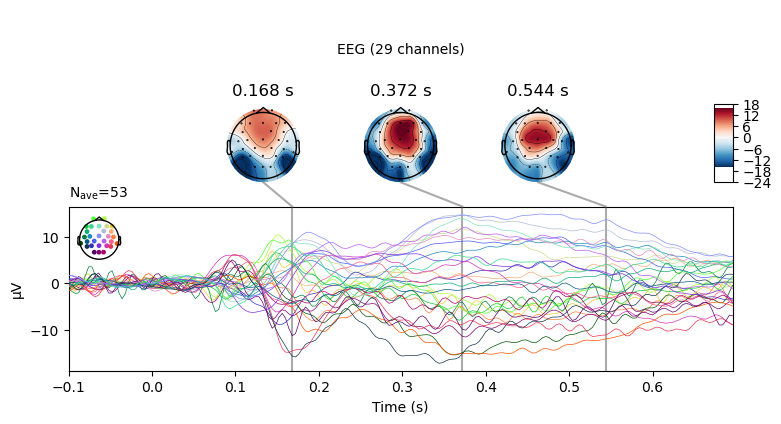

No projector specified for this dataset. Please consider the method self.add_proj.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


No projector specified for this dataset. Please consider the method self.add_proj.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


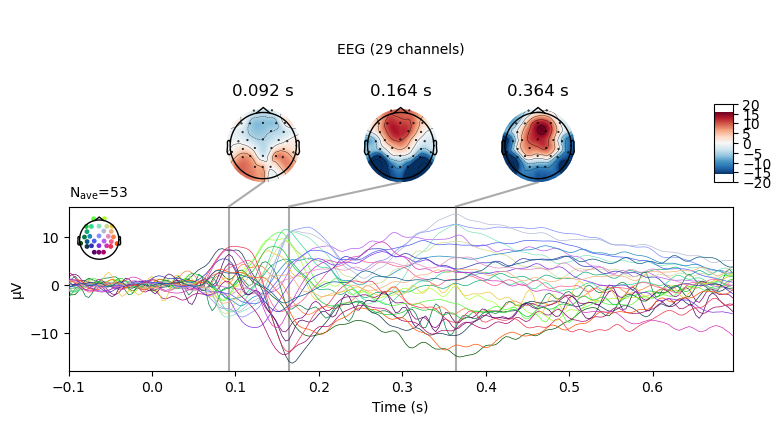

No projector specified for this dataset. Please consider the method self.add_proj.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


In [20]:
#Butterfly plots:

img_wNeu_evoked.plot_joint(picks='eeg');

img_wPos_evoked.plot_joint(picks='eeg');

img_wNeg_evoked.plot_joint(picks='eeg');

img_evoked.plot_joint(picks='eeg');

combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


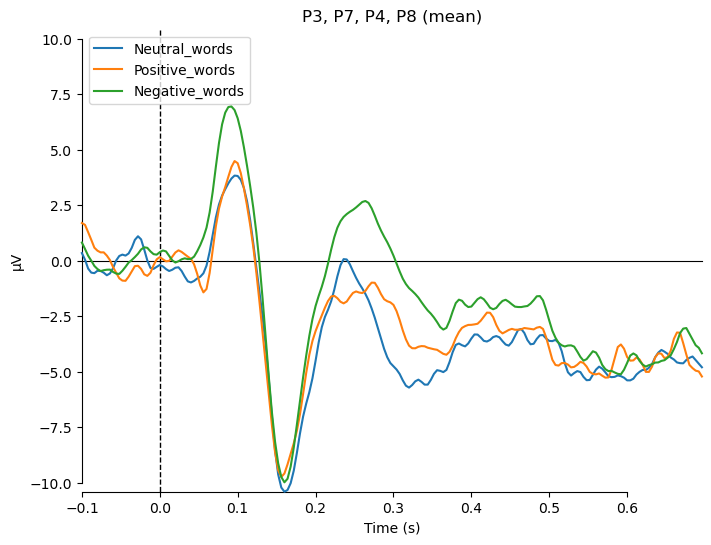

[<Figure size 800x600 with 1 Axes>]

In [21]:
evokeds = dict(Neutral_words = img_wNeu_evoked, Positive_words=img_wPos_evoked, Negative_words=img_wNeg_evoked)
picks = ['P3', 'P7', 'P4', 'P8']
mne.viz.plot_compare_evokeds(evokeds, picks=picks, combine="mean")

combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


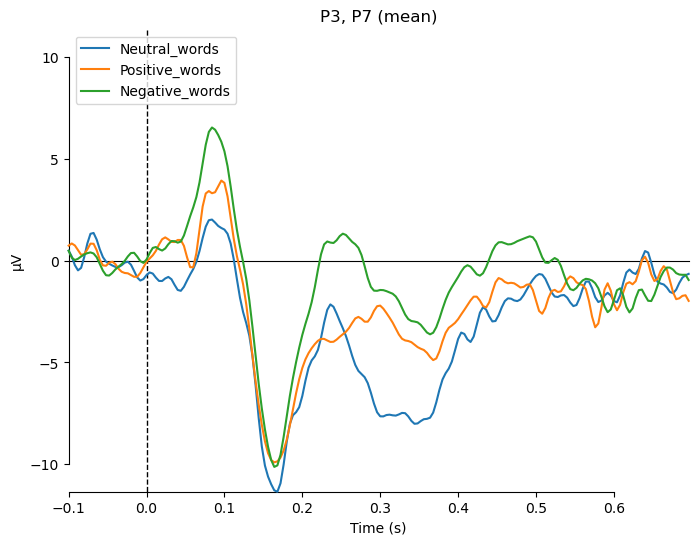

[<Figure size 800x600 with 1 Axes>]

In [22]:
evokeds = dict(Neutral_words = img_wNeu_evoked, Positive_words=img_wPos_evoked, Negative_words=img_wNeg_evoked)
picks = ['P3', 'P7']
mne.viz.plot_compare_evokeds(evokeds, picks=picks, combine="mean")

combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


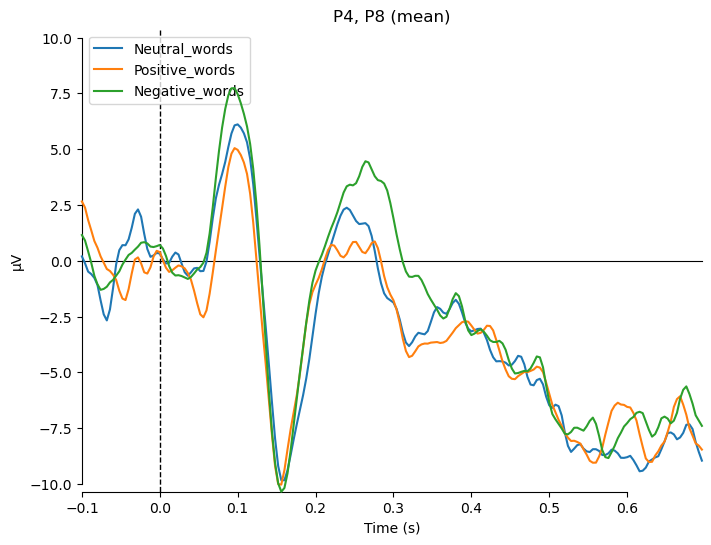

[<Figure size 800x600 with 1 Axes>]

In [23]:
evokeds = dict(Neutral_words = img_wNeu_evoked, Positive_words=img_wPos_evoked, Negative_words=img_wNeg_evoked)
picks = ['P4', 'P8']
mne.viz.plot_compare_evokeds(evokeds, picks=picks, combine="mean")

### Plotting topographies 

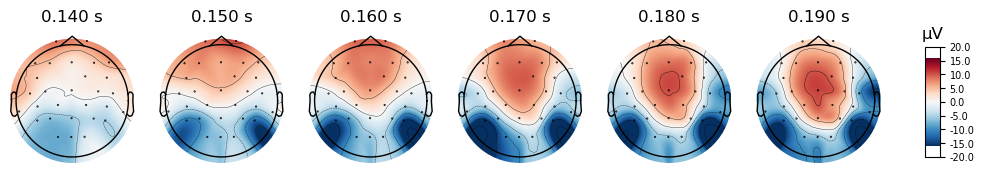

In [30]:
times = np.arange(0.14, 0.2, 0.01)
img_wNeu_evoked.plot_topomap(times, ch_type="eeg");

In [31]:
times = np.arange(0.14, 0.2, 0.01)
img_wNeg_evoked.plot_topomap(times, ch_type="eeg");

In [32]:
times = np.arange(0.14, 0.2, 0.01)
img_wPos_evoked.plot_topomap(times, ch_type="eeg");